# Градиентный бустинг над решающими деревьями

###### Введение
Построение композиции — важный подход в машинном обучении, который позволяет объединять большое количество слабых алгоритмов в один сильный. Данный подход широко используется на практике в самых разных задачах.

На лекциях был рассмотрен метод градиентного бустинга, который последовательно строит композицию алгоритмов, причем каждый следующий алгоритм выбирается так, чтобы исправлять ошибки уже имеющейся композиции. Обычно в качестве базовых алгоритмов используют деревья небольшой глубины, поскольку их достаточно легко строить, и при этом они дают нелинейные разделяющие поверхности.

Другой метод построения композиций — случайный лес. В нем, в отличие от градиентного бустинга, отдельные деревья строятся независимо и без каких-либо ограничений на глубину — дерево наращивается до тех пор, пока не покажет наилучшее качество на обучающей выборке.

В этом задании мы будем иметь дело с задачей классификации. В качестве функции потерь будем использовать log-loss:

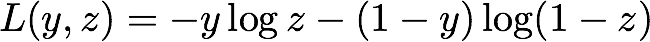
Здесь через y обозначен истинный ответ, через z — прогноз алгоритма. Данная функция является дифференцируемой, и поэтому подходит для использования в градиентном бустинге. Также можно показать, что при ее использовании итоговый алгоритм будет приближать истинные вероятности классов.

###### Реализация в sklearn
В пакете scikit-learn градиентный бустинг реализован в модуле ensemble в виде классов GradientBoostingClassifier и GradientBoostingRegressor. Основные параметры, которые будут интересовать нас: n_estimators, learning_rate. Иногда может быть полезен параметр verbose для отслеживания процесса обучения.

Чтобы была возможность оценить качество построенной композиции на каждой итерации, у класса есть метод staged_decision_function. Для заданной выборки он возвращает ответ на каждой итерации.

Помимо алгоритмов машинного обучения, в пакете scikit-learn представлено большое число различных инструментов. В этом задании будет предложено воспользоваться функцией train_test_split модуля cross_validation. С помощью нее можно разбивать выборки случайным образом. На вход можно передать несколько выборок (с условием, что они имеют одинаковое количество строк). Пусть, например, имеются данные X и y, где X — это признаковое описание объектов, y — целевое значение. Тогда следующий код будет удобен для разбиения этих данных на обучающее и тестовое множества:  
(Обратите внимание, что при фиксированном параметре random_state результат разбиения можно воспроизвести.)

In [ ]:
# X_train, X_test, y_train, y_test = 
#                      train_test_split(X, y, 
#                                       test_size=0.33, 
#                                       random_state=42)

Метрика log-loss реализована в пакете metrics: sklearn.metrics.log_loss. Заметим, что данная метрика предназначена для классификаторов, выдающих оценку принадлежности классу, а не бинарные ответы. И градиентный бустинг, и случайный лес умеют строить такие прогнозы — для этого нужно использовать метод predict_proba:  
Метод predict_proba возвращает матрицу, i-й столбец которой содержит оценки принадлежности i-му классу. 

In [ ]:
# pred = clf.predict_proba(X_test)

Для рисования кривых качества на обучении и контроле можно воспользоваться следующим кодом:

In [ ]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# plt.figure()
# plt.plot(test_loss, 'r', linewidth=2)
# plt.plot(train_loss, 'g', linewidth=2)
# plt.legend(['test', 'train'])

Загрузите выборку из файла gbm-data.csv с помощью pandas и преобразуйте ее в массив numpy (параметр values у датафрейма). В первой колонке файла с данными записано, была или нет реакция. Все остальные колонки (d1 - d1776) содержат различные характеристики молекулы, такие как размер, форма и т.д. Разбейте выборку на обучающую и тестовую, используя функцию train_test_split с параметрами test_size = 0.8 и random_state = 241. 

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('gbm-data.csv')

In [6]:
# data_np = data.values

In [3]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                      test_size=0.8, 
                                      random_state=241)

Обучите GradientBoostingClassifier с параметрами n_estimators=250, verbose=True, random_state=241 и для каждого значения learning_rate из списка [1, 0.5, 0.3, 0.2, 0.1] проделайте следующее:
- Используйте метод staged_decision_function для предсказания качества на обучающей и тестовой выборке на каждой итерации.
- Преобразуйте полученное предсказание с помощью сигмоидной функции по формуле 1 / (1 + e^{−y_pred}), где y_pred — предсказанное значение.
- Вычислите и постройте график значений log-loss (которую можно посчитать с помощью функции sklearn.metrics.log_loss) на обучающей и тестовой выборках, а также найдите минимальное значение метрики и номер итерации, на которой оно достигается.

      Iter       Train Loss   Remaining Time 
         1           1.0190           10.44s
         2           0.9192            8.52s
         3           0.8272            8.23s
         4           0.7834            9.03s
         5           0.7109            8.72s
         6           0.6368            9.27s
         7           0.5797            8.76s
         8           0.5610            9.06s
         9           0.5185            8.85s
        10           0.4984            8.68s
        20           0.1999            8.71s
        30           0.1313            8.28s
        40           0.0790            7.86s
        50           0.0511            7.45s
        60           0.0352            7.01s
        70           0.0245            6.63s
        80           0.0162            6.26s
        90           0.0114            5.91s
       100           0.0077            5.54s
       200           0.0002            1.81s
      Iter       Train Loss   Remaining Time 
        

,iter,loss,lr
51,52,0.525905,0.1


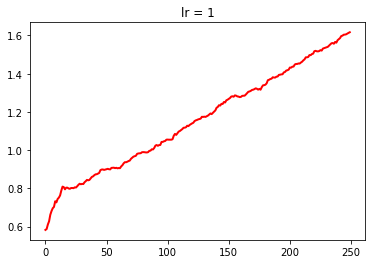

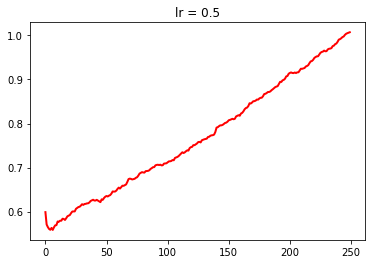

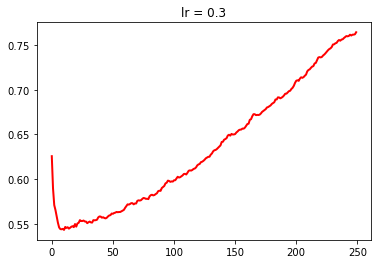

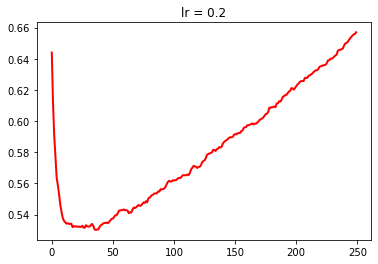

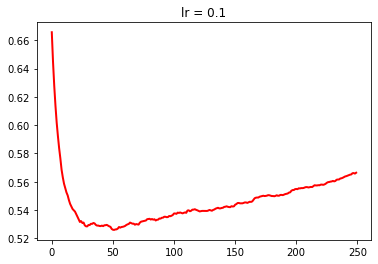

In [39]:
test_loss_total = []
lr = [1, 0.5, 0.3, 0.2, 0.1]
for i in lr:
    clf = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241, learning_rate=i)
    clf.fit(X_train, y_train)
    
    # Получение значений лосса по итерациям
    test_loss = []
    for j, y_pred in enumerate(clf.staged_decision_function(X_test)):
        y_pred = 1.0 / (1.0 + np.exp(- y_pred))
        test_loss.append([j + 1, log_loss(y_test, y_pred), i])
        test_loss_total.append([j + 1, log_loss(y_test, y_pred), i])
    test_loss = pd.DataFrame(test_loss, columns=['iter','loss', 'lr'])
    
    plt.figure()
    plt.plot(test_loss['loss'], 'r', linewidth=2)
    plt.title(f'lr = {i}')
    
# Извлечение значения минимального лосса
test_loss[test_loss['loss']==test_loss['loss'].min()]

Как можно охарактеризовать график качества на тестовой выборке, начиная с некоторой итерации: переобучение (overfitting) или недообучение (underfitting)?  
overfitting

Приведите минимальное значение log-loss на тестовой выборке и номер итерации, на котором оно достигается, при learning_rate = 0.2.

In [47]:
test_loss_total = pd.DataFrame(test_loss_total, columns=['iter','loss', 'lr'])
test_loss_total[test_loss_total['loss'] == test_loss_total[(test_loss_total['lr'] == 0.2)]['loss'].min()] 

,iter,loss,lr
786,37,0.530165,0.2


5. На этих же данных обучите RandomForestClassifier с количеством деревьев, равным количеству итераций, на котором достигается наилучшее качество у градиентного бустинга из предыдущего пункта, c random_state=241 и остальными параметрами по умолчанию. Какое значение log-loss на тесте получается у этого случайного леса? (Не забывайте, что предсказания нужно получать с помощью функции predict_proba. В данном случае брать сигмоиду от оценки вероятности класса не нужно)

In [64]:
n = test_loss[test_loss['loss']==test_loss['loss'].min()]['iter'].values[0]
n

52

In [65]:
clf = RandomForestClassifier(n_estimators=n, random_state=241)
clf.fit(X_train, y_train)
clf.predict_proba(X_test)
print(log_loss(y_test, y_pred))

0.5663426128685223


Обратите внимание, что, хотя в градиентного бустинге гораздо более слабые базовые алгоритмы, он выигрывает у случайного леса благодаря более "направленной" настройке — каждый следующий алгоритм исправляет ошибки имеющейся композиции. Также он обучается быстрее случайного леса благодаря использованию неглубоких деревьев. В то же время, случайный лес может показать более высокое качество при неограниченных ресурсах — так, он выиграет у градиентного бустинга на наших данных, если увеличить число деревьев до нескольких сотен (проверьте сами!).